In [91]:
import pandas as pd
from collections import Counter

from computeNutriScore import computeNutriScore

DATA_FOLDER = './data/'

In [66]:
# Load Data and Clean
Data_raw = pd.read_csv(DATA_FOLDER + 'en.openfoodfacts.org.products.csv', delimiter = '\t', low_memory = False)

Data_raw.set_index('code', inplace = True)

#Drop all the row and column with all NaN
Data_raw.dropna(axis = 0, how = 'all', inplace = True)
Data_raw.dropna(axis = 1, how = 'all', inplace = True)
Data_raw.drop_duplicates(inplace = True)

Data_raw = Data_raw[~Data_raw.product_name.isna()]

In [82]:
column_for_Nutri_Score_Computation = ['categories_tags','energy_100g','fat_100g','saturated-fat_100g','sugars_100g',
'salt_100g','sodium_100g','fruits-vegetables-nuts_100g','fruits-vegetables-nuts-estimate_100g','nutrition-score-fr_100g',
'nutrition-score-uk_100g','fiber_100g','proteins_100g', 'nutrition_grade_fr']

Food_data_set = Data_raw[column_for_Nutri_Score_Computation].copy()
#Food_data_set.dropna(axis = 0, how = 'all', inplace = True)

#pour Remi : aliments à completer si il n'y a pas de valeur dans une colonne hormis nutrition-score-fr_100g,
#nutrition-score-uk_100g et nutrition_grade_fr (ceci c'est Valentin qui complete)
Food_data_set_to_complete = Food_data_set[~Food_data_set.categories_tags.isna()].copy()

#pour Valentin : aliment avec déjà nutriScore
Food_data_set_to_verify_score = Food_data_set[~Food_data_set.nutrition_grade_fr.isna()].copy()

In [90]:
print("The proportion of Data with already Nutri Score : {} %".format(len(Food_data_set_to_verify_score) * 100 / len(Food_data_set)))

The proportion of Data with already Nutri Score : 20.760391115889924 %


In [93]:
for index, row in Food_data_set_to_verify_score.iterrows():
    NutriScore = computeNutriScore(row)
    row['Predicted_NutriScore'] = NutriScore

AttributeError: 'str' object has no attribute 'str'

In [3]:
# Collect DataBase with only the food components
def Search2list(list_, string_):
    list_return = []
    for element in list_:
        if string_ in element:
            list_return.append(element)
    return list_return
column_food = Search2list(list(Data_raw.columns), '100g')
Food_components = Data_raw[column_food].copy()
Food_components.dropna(axis = 0, how = 'all', inplace = True)
Food_components.dropna(axis = 1, how = 'all', inplace = True)

In [4]:
#Collect DataBase with already Nutriscore
Nutri_Score_Data = Data_raw[['nutrition_grade_fr']].copy().dropna()
len(Nutri_Score_Data) * 100/len(Food_components)

23.205419678448724

In [5]:


Nutri_Score_Test = Data_raw[column_for_Nutri_Score_Test].copy()

Nuctri_Score_Train = Nutri_Score_Data.join(Nutri_Score_Test)

In [64]:
Data_raw[['salt_100g']].dropna()

,salt_100g
code,
0000000000017,1.400
0000000000123,2.040
0000000000949,0.420
0000000000970,0.250
0000000001137,0.678
0000000001151,0.900
0000000001199,0.464
0000000001281,0.100
0000000001311,3.200


In [57]:
a = [tags.split(',') for tags in list(Data_raw[['categories_tags']].dropna().categories_tags)]

list_tags = []
for tags in a:
    for tag in tags:
        list_tags.append(tag)
        
dic = dict(Counter(list_tags).most_common())

with open('list_tags.txt', 'w', encoding="utf-8") as doc:
    for key, value in dic.items():
        text = '{} has {} items\n'.format(str(key), str(value))
        doc.write(text)
    

In [61]:
list(dic.keys())

['en:plant-based-foods-and-beverages',
 'en:plant-based-foods',
 'en:beverages',
 'en:sugary-snacks',
 'en:dairies',
 'en:non-alcoholic-beverages',
 'en:fruits-and-vegetables-based-foods',
 'en:meals',
 'en:cereals-and-potatoes',
 'en:fermented-foods',
 'en:fermented-milk-products',
 'en:biscuits-and-cakes',
 'en:spreads',
 'en:meats',
 'en:cereals-and-their-products',
 'en:groceries',
 'en:breakfasts',
 'en:desserts',
 'en:plant-based-beverages',
 'en:fruits-based-foods',
 'en:frozen-foods',
 'en:cheeses',
 'en:canned-foods',
 'en:prepared-meats',
 'en:vegetables-based-foods',
 'en:sugared-beverages',
 'en:sweet-spreads',
 'en:chocolates',
 'en:sauces',
 'en:biscuits',
 'en:alcoholic-beverages',
 'en:confectioneries',
 'en:fresh-foods',
 'en:salty-snacks',
 'en:fruit-based-beverages',
 'en:plant-based-spreads',
 'en:seafood',
 'en:fats',
 'en:appetizers',
 'en:yogurts',
 'en:juices-and-nectars',
 'en:fruit-juices-and-nectars',
 'en:condiments',
 'en:fruit-preserves',
 'en:fishes',
 'e

In [12]:
Nuctri_Score_Train[~Nuctri_Score_Train['fruits-vegetables-nuts_100g'].isna()]

,nutrition_grade_fr,categories_tags,energy_100g,fat_100g,saturated-fat_100g,sugars_100g,salt_100g,sodium_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,fiber_100g,proteins_100g
code,,,,,,,,,,,,,,
000031,d,"en:sugary-snacks,en:desserts,en:biscuits-and-c...",1670.0,15.00,2.00,34.00,0.60000,0.236220,37.4,NaN,12.0,12.0,1.50,4.900
00023092,d,"en:sugary-snacks,en:biscuits-and-cakes,en:bisc...",2030.0,26.80,7.60,29.40,0.37000,0.145669,12.0,NaN,18.0,18.0,1.90,6.000
00031858,b,"en:plant-based-foods-and-beverages,en:plant-ba...",188.0,2.10,0.70,2.40,0.75000,0.295276,38.0,NaN,2.0,2.0,0.80,0.800
0012345678905,a,"en:salty-snacks,en:appetizers",448.0,4.20,0.90,5.70,1.00000,0.393701,50.0,40.0,-1.0,-1.0,2.41,7.100
0014113911719,c,"en:plant-based-foods-and-beverages,en:plant-ba...",2469.0,46.00,5.60,7.80,0.00000,0.000000,100.0,NaN,3.0,3.0,NaN,21.400
0016229901226,e,"en:plant-based-foods-and-beverages,en:beverage...",187.0,0.00,0.00,11.00,0.06000,0.023622,25.0,NaN,15.0,2.0,0.00,0.000
0022314010025,d,"en:plant-based-foods-and-beverages,en:plant-ba...",1130.0,0.80,0.20,50.20,0.00000,0.000000,50.0,NaN,11.0,11.0,1.90,1.300
0031200457011,c,"en:plant-based-foods-and-beverages,en:beverage...",42.0,0.00,0.00,1.50,0.04000,0.015748,0.0,NaN,3.0,0.0,NaN,0.000
00319980,b,"en:plant-based-foods-and-beverages,en:plant-ba...",2527.0,47.50,7.30,4.40,0.05000,0.019685,100.0,NaN,2.0,2.0,2.70,21.800


In [138]:
Food_compon_Nutri = Nutri_Score_Data.join(Food_components)
Food_compon_Nutri.dropna(axis = 1, how = 'all', inplace = True)

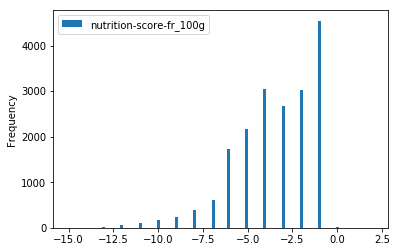

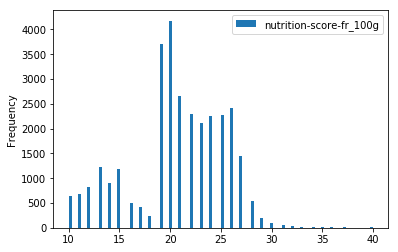

In [158]:
Food_compon_Nutri.loc[Food_compon_Nutri.nutrition_grade_fr == 'a', ['nutrition-score-fr_100g']].plot.hist(bins = 100)
Food_compon_Nutri.loc[Food_compon_Nutri.nutrition_grade_fr == 'e', ['nutrition-score-fr_100g']].plot.hist(bins = 100)

In [135]:
len(Nutri_Score_Data)

136569

In [131]:
len(Data_raw)

681575

In [132]:
len(Food_components)

588522

In [124]:
len(Nutri_Score_Data)/len(Data_raw)

0.20036766324042476

In [92]:
Boissons = Data_raw.categories.str.contains('Boissons', case = False)
Boissons.dropna(inplace = True)
len(Boissons[Boissons])

21058

In [84]:
Boissons_1 = Data_raw.categories_tags.str.contains('beverages', case = False)
Boissons_1.dropna(inplace = True)
len(Boissons_1[Boissons_1])


69907

In [77]:
Boissons_2 = Data_raw.categories_en.str.contains('Beverages', case = False)
Boissons_2.dropna(inplace = True)
len(Boissons_2[Boissons_2])

69907